# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint as pprint

# Import API key
#import api_keys
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [56]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

In [57]:
data=pd.DataFrame({"City":cities})
data['Cloudiness'] = ""
data['Country'] = ""
data['Date'] = ""
data['Humidity'] = ""
data['Lat'] = ""
data['Lng'] = ""
data['Max Temp'] = ""
data['Wind Speed'] = ""
data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tsihombe,,,,,,,,
1,castro,,,,,,,,
2,katsuura,,,,,,,,
3,kapaa,,,,,,,,
4,ushuaia,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [58]:
for i in range(len(cities)-1):
    city=cities[i]
    url=f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=metric&appid={api_key}"
    response=requests.get(url).json()
    results=response
    try:
        print(f"Processing Record {cities.index(city)}| {city}")
        data.loc[i,'Cloudiness']=response['clouds']['all']
        data.loc[i,'Country']=response['sys']['country']
        data.loc[i,'Date']=response['dt']
        data.loc[i,'Humidity']=response['main']['humidity']
        data.loc[i,'Lat']=response['coord']['lat']
        data.loc[i,'Lng']=response['coord']['lon']
        data.loc[i,'Max Temp']=response['main']['temp_max']
        data.loc[i,'Wind Speed']=response['wind']['speed']
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
          

Processing Record 0| tsihombe
City not found. Skipping...
Processing Record 1| castro
Processing Record 2| katsuura
Processing Record 3| kapaa
Processing Record 4| ushuaia
Processing Record 5| hermanus
Processing Record 6| san rafael
Processing Record 7| armidale
Processing Record 8| ribeira grande
Processing Record 9| hohhot
Processing Record 10| bluff
Processing Record 11| bousso
City not found. Skipping...
Processing Record 12| saint-francois
Processing Record 13| grand river south east
City not found. Skipping...
Processing Record 14| yellowknife
Processing Record 15| fort frances
Processing Record 16| cherskiy
Processing Record 17| khatanga
Processing Record 18| labuhan
Processing Record 19| iqaluit
Processing Record 20| hithadhoo
Processing Record 21| rikitea
Processing Record 22| mahebourg
Processing Record 23| hobart
Processing Record 24| san fernando
Processing Record 25| ahipara
Processing Record 26| luganville
Processing Record 27| port alfred
Processing Record 28| wanning
P

Processing Record 231| uhlove
Processing Record 232| flinders
Processing Record 233| limenaria
Processing Record 234| linxia
Processing Record 235| saint-augustin
Processing Record 236| berlevag
Processing Record 237| intipuca
Processing Record 238| talnakh
Processing Record 239| angren
Processing Record 240| muros
Processing Record 241| sorland
Processing Record 242| aklavik
Processing Record 243| chifeng
Processing Record 244| hovd
Processing Record 245| nizhneyansk
City not found. Skipping...
Processing Record 246| souillac
Processing Record 247| kastamonu
Processing Record 248| azangaro
Processing Record 249| bucak
Processing Record 250| bethel
Processing Record 251| lagoa
Processing Record 252| eydhafushi
Processing Record 253| diego de almagro
Processing Record 254| clevelandia
Processing Record 255| necochea
Processing Record 256| fairlie
Processing Record 257| lata
Processing Record 258| naze
Processing Record 259| krasnyy yar
Processing Record 260| faanui
Processing Record 261

Processing Record 466| chake chake
Processing Record 467| saldanha
Processing Record 468| lahad datu
Processing Record 469| makung
City not found. Skipping...
Processing Record 470| ostrovnoy
Processing Record 471| nishihara
Processing Record 472| viligili
City not found. Skipping...
Processing Record 473| rorvik
Processing Record 474| borogontsy
Processing Record 475| hay river
Processing Record 476| iranshahr
Processing Record 477| ayolas
Processing Record 478| sitka
Processing Record 479| vung tau
Processing Record 480| laibin
Processing Record 481| deputatskiy
Processing Record 482| constantine
Processing Record 483| arman
Processing Record 484| port macquarie
Processing Record 485| tumaco
Processing Record 486| gladstone
Processing Record 487| tavda
Processing Record 488| lorengau
Processing Record 489| iquitos
Processing Record 490| filadelfia
Processing Record 491| atbasar
Processing Record 492| pochutla
Processing Record 493| priladozhskiy
Processing Record 494| taikang
Process

In [61]:
data.count()

City          601
Cloudiness    601
Country       601
Date          601
Humidity      601
Lat           601
Lng           601
Max Temp      601
Wind Speed    601
dtype: int64

In [113]:
data=data.dropna(how='any')
data


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tsihombe,,,,,,,,
1,castro,0,CL,1547920800,53,-42.48,-73.76,24,3.1
2,katsuura,75,JP,1547920800,70,33.93,134.5,6,3.1
3,kapaa,40,US,1547920560,73,22.08,-159.32,22.2,7.2
4,ushuaia,40,AR,1547920800,58,-54.81,-68.31,14,12.9
5,hermanus,0,ZA,1547923213,64,-34.42,19.24,15.56,2.26
6,san rafael,0,AR,1547923314,29,-34.61,-68.33,29.46,6.11
7,armidale,92,AU,1547923315,97,-30.51,151.67,18.61,1.46
8,ribeira grande,40,PT,1547920800,82,38.52,-28.7,17,1
9,hohhot,0,CN,1547920800,60,40.81,111.65,-12,4


In [81]:
data_clean=data.loc[data["Cloudiness"]!="",:]
data_clean

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,castro,0,CL,1547920800,53,-42.48,-73.76,24,3.1
2,katsuura,75,JP,1547920800,70,33.93,134.5,6,3.1
3,kapaa,40,US,1547920560,73,22.08,-159.32,22.2,7.2
4,ushuaia,40,AR,1547920800,58,-54.81,-68.31,14,12.9
5,hermanus,0,ZA,1547923213,64,-34.42,19.24,15.56,2.26
6,san rafael,0,AR,1547923314,29,-34.61,-68.33,29.46,6.11
7,armidale,92,AU,1547923315,97,-30.51,151.67,18.61,1.46
8,ribeira grande,40,PT,1547920800,82,38.52,-28.7,17,1
9,hohhot,0,CN,1547920800,60,40.81,111.65,-12,4
10,bluff,0,AU,1547923316,90,-23.58,149.07,19.73,2.51


In [71]:
#url=f"http://api.openweathermap.org/data/2.5/weather?q={cities[0]}&units=metric&appid={api_key}"
#response=requests.get(url).json()
#response


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [133]:
data_clean.to_csv("../Output/cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [83]:
data_clean.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,castro,0,CL,1547920800,53,-42.48,-73.76,24,3.1
2,katsuura,75,JP,1547920800,70,33.93,134.5,6,3.1
3,kapaa,40,US,1547920560,73,22.08,-159.32,22.2,7.2
4,ushuaia,40,AR,1547920800,58,-54.81,-68.31,14,12.9
5,hermanus,0,ZA,1547923213,64,-34.42,19.24,15.56,2.26


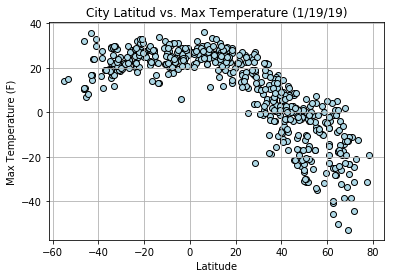

In [129]:
plt.scatter(data_clean["Lat"],data_clean["Max Temp"],marker="o",facecolors="lightblue",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitud vs. Max Temperature (1/19/19)")
plt.grid()
plt.savefig("../Output/Lat_Temp")

#### Latitude vs. Humidity Plot

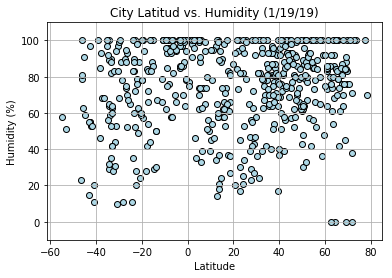

In [130]:
plt.scatter(data_clean["Lat"],data_clean["Humidity"],marker="o",facecolors="lightblue",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(-10,110)
plt.title("City Latitud vs. Humidity (1/19/19)")
plt.grid()
plt.savefig("../Output/Lat_Humidity")

#### Latitude vs. Cloudiness Plot

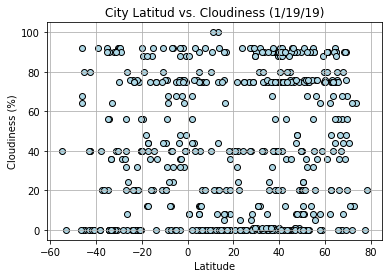

In [131]:
plt.scatter(data_clean["Lat"],data_clean["Cloudiness"],marker="o",facecolors="lightblue",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
#plt.ylim(-10,110)
plt.title("City Latitud vs. Cloudiness (1/19/19)")
plt.grid()
plt.savefig("../Output/Lat_Cloud")

#### Latitude vs. Wind Speed Plot

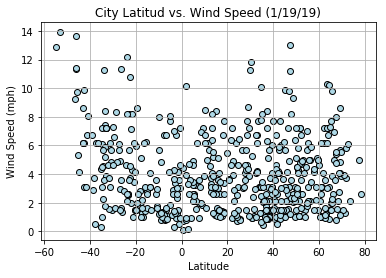

In [132]:
plt.scatter(data_clean["Lat"],data_clean["Wind Speed"],marker="o",facecolors="lightblue",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
#plt.ylim(-10,110)
plt.title("City Latitud vs. Wind Speed (1/19/19)")
plt.grid()
plt.savefig("../Output/Lat_Windspeed")